In [1]:
%load_ext autoreload
%autoreload 2

# Applying CRIPS-DM Methodology to a Business Problem

## Dataset 2 - Predicting Customer Churn in the Telecomunication Provider

### 1. Bussiness Understanding

#### 1.1 Business Understanding

In the telecomunications industry, holding onto customers is a make-or-break deal. It's like trying to keep water in a leaky bottle. If we're losing customers faster than we're gaining new ones, it's a problem. Suppose we're pouring water into a bottle, but there're leaking out from the bottom, our bottle will never got filled. To ensure a long-term success in our business(in this case, the telecommunication provider), we need to take customer retention seriously and act on it.

Predicting and dealing with customer churn is a big deal. It's all about figuring out which customers might leave our service and taking action to prevent that from happening. We're curious about things like, "Do customers who have international charges ten to leave more often?" or "Are customers who have been with us for a certain time more likely to stick arond and not leave?" These questions we're aiming to answer, to understand the reasons behind customer churn and come up with the effective strategies to keep our business thriving.

#### 1.2 Business Success Criteria
The success of our project is to achieving accurate predictions of customer churn within the telecomunication industry. The primary objective is to develop a predictive model that effectively identifies whether a customer is likely to stop using our servies. There are some criteria that need to be considerd:
1. **Predictive Accuracy:** Our model must be able to achieve a high level of accuracy in distinguishing between customers who are likely to churn and those who are not.

2. **Minimizing False Negatives and False Positives:** While overall accuracy is crucial, it's essential to consider to minimize both false negatives and false positives. In our case, false positives is when failing to predict churn when it occurs, and false negatives is predicting a customer will churn when they do not. Balancing the trade-off between these two aspects will ensure that our model give an actionable insights that can be use in a business case while avoiding any undue concerns.

3. **Interpretability and Insights:** A meaningful outcomes is the ability to derive any insights from the model. Our goal is to understand any factors and features that may contribute to customer churn, and this understanding can help us to informed any business decisions and implements targeted strategies.

4. **Generalizability:** The model's should be able to capture an unseen data. We should ensures that our predictions will remain robust and reliable even when applied to real-world scenarios.

5. **Impact on Customer Retention:** Undoubtly, the criteria of business relies on our model's ability to drive postive outcomes for the business. Suppose the model accurately identifies customers churning, we need to use any appropiate countermeasures to retain them, whether to bolstering customer loyalty and maintaining customer satisfaction for a long term business sustainability.

#### 1.3 Assess Situation

- **Personnel:** We may need to access business experts who understand the infrastructure of the telecom industry.

- **Data:** Our dataset comprises of 4250 samples with 19 features, and one target variable ('churn'). The data is obtained from the kaggle competition. (https://www.kaggle.com/competitions/customer-churn-prediction-2020/overview/description)

- **Computing Resources:** For computing resources, we utilized my local machine, specifically the Macbook Air M1. This served as the primary machine for running the project and conducting analysis.

- **Software:** To streamline our project workflow and create an effective development environment, we employed a combination of tools. We started by using cookiecutter data science template (https://github.com/drivendata/cookiecutter-data-science), which provided a structured project framework. For managing Python versions and setting up the specify environment, we relied on 'pyenv', ensuring compatibility with Python 3.9.13. Additionally, we utilized 'Poetry', a dependency management tool, to create and manage our project's virtual environment. This combination of software tools facilitated a seamless and organized approach to developing our project.

#### 1.4 Requirements, Assumptions, and Constraints
- **Requirements:** The project's timeline should aligns with the business's goals (2 weeks). The results must be comprehensible and reliable, and we will ensure our project lied under a legal compliance.

- **Assumptions:** We will assume that the data have reflects the customer behavior effectively. Moreover, we need to acknowledge assumptions bases on the business context.

- **Constraints:** We'll work within resource limitations, the availability of personnel and the practicality of data size for modeling.

#### 1.5 Risk and Contingencies
- **Data Quality:** Inaccurate or missing data might lead to biased predictions. Proper countermeasure like data cleaning, handling missing values, and outlier detection need to be consider.

- **Imbalanced Dataset:** The class distribution of the target variable in our dataset might be imbalanced, meaning that one class (churned or not churned) significantly outnumbers the other. This can lead to biased predictions, where the model will always predict the majority class more frequently. There are many techniques to handle with the imbalanced data, such as oversampling the minority class, undersampling the majority class, or using synthetic data generation methods like SMOTE (Synthetic Minority Over-sampling Technique).

- **Model Overfitting:** Building a predictive models, there's a risk of overfitting, where the model learns to perform well on the training data but struggles to generalize to an unseen data. Hyperparameter tunning and regularization techniques such as L1 and L2 can counter the risk.

- **Other Technical Challenges:** Unexpected technical issues can arise during the project, impacting our progress and outcomes. We will maintain open communication with the project coordinator.

#### 1.6 Terminilogy
- **Business Terminology:** Understanding terms like "churn", "international plan", and "voicemail plan" is essential to interpret business needs.

- **Data Mining and Modeling Terminology:** Terms like "Feature Engineering", "AUCROC", "Hyperparameter Tuning" must be well-defined for an effective communications.

#### 1.7 Cost Analysis
##### 1.7.1 Cost of False Negatives (Model Predicted Not Churning, but Actuall Does)
Falses negatives are cases where the model predicts that a customer will not churn, but they actually do. The potential cost are as follow:

1. **Loss of Revenue:**
When a customer churns, the company loses the revenue generated from their subscription. We'll assume the average monthly revenue. We will assume that average monthly revenue generated from a customer's subscription is $41. (https://www.canstarblue.com.au/phone/average-mobile-phone-bill/#:~:text=The%20average%20postpaid%20phone%20plan,in%20Tasmania%20are%20paying%20more.)

2. **Churn Recovery Cost:** 
If a customer churns, the company need to invest resources in targeted retention efforts to win the customer back. This include offering discounts, promotions. We will assume the average cost of retention is $30 per customer.

3. **Opportunity Cost:**
Missed opportunities for upselling, cross-selling and other revenue generating activites from churned customer. We'll assume the average revenue generated from additional cost is $200.

4. **Customer Lifetime Value:**
If a customer stays with us for an extended period, they generate revenue over time. Let's assume the average lifetime value of a retained customer is (clv = customer value * average customer life span) Average account_length = 100 month -> (41 * 100) = $4100 per customer.

**Total Cost of False Negatives:**

Total Cost = Loss of Revenue + Churn Recovery Cost + Opportunity Cost + Customer Lifetime Value

Total Cost = (41 * A) + (30 * A) + (200 * A) + (4100 * A)

**Total Cost of False Negatives = $4371 * A**

Where "A" represent the number of False Negative Predicted by the models

##### 1.7.2 Cost of False Postives (Model Predicted Churning, but Actuall Doesn't)
False postivives are cases where the model predicts that a customer will churn , but actually do not. The potential cost are as follow:

1. **Retention Costs:**
Average cost of retention per customer: $30

2. **Marketing Costs:**
Cost incurred in targeted marketing and retention efforts for customers predicted to churn but actually does not. We will assume the avearge marketing cost loses per customer of $50.

3. **Opportunity Cost:**
The opportunity cost in the context of false positives refers to the potential benefits or revenue that a company misses out on when it invests resources in retaining customers predicted to churn but who ultimately don't. These resources could have been better used to target customers who truly need retention efforts. We'll assume opportunity cost of $200 per customer.

**Total Cost of False Positives:**

Total Cost = Retention Cost + Marketing Cost + Opportunity Cost

Total Cost = (30 * B) + (50 * B) + (200 * B)

**Total Cost of False Positives = $280 * B**


### 2. Data Understanding

**[2.1]** Import the pandas and numpy package

In [2]:
import pandas as pd
import numpy as np

**[2.2]** Load the dataset into a dataframe called df

In [3]:
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

**[2.3]** Display the first 5 rows of df

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**[2.4]** Display the dimensions (shape) of df

In [5]:
df.shape

(7043, 21)

**[2.5]** Display the summary (info) of df

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**[2.6]** Display the descriptive statistics of df

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**[2.7]** Checking Missing values by Importing the missing_value function

In [8]:
import sys
sys.path.insert(0, '../src')

In [9]:
from data.data_preprocessing import missing_value, duplicate_value

In [10]:
missing_value(df)

There are no missing values in the DataFrame.


**[2.8]** Checking Duplicated values by importing the duplicated_value function

In [11]:
duplicate_value(df)

There are no duplicated rows in the DataFrame.


#### Data description summary

Our dataset contains a total of 7043 rows, with 20 features, and one target variable ('Churn'). There are no missing and duplicated values within the dataset, and each feature can be categorized as follows:

| Feature         | Data Type | Description                                      |
|-----------------|-----------|--------------------------------------------------|
| customerID      | object    | Unique identifier for each customer.            |
| gender          | object    | Gender of the customer (Male/Female).           |
| SeniorCitizen   | int64     | Binary feature indicating senior citizenship (1) or not (0). |
| Partner         | object    | Binary feature indicating presence of a partner (1) or not (0). |
| Dependents      | object    | Binary feature indicating presence of dependents (1) or not (0). |
| tenure          | int64     | Duration in months that the customer has been with the company. |
| PhoneService    | object    | Binary feature indicating phone service subscription (1) or not (0). |
| MultipleLines   | object    | Indicates whether the customer has multiple phone lines. |
| InternetService | object    | Type of internet service subscribed to by the customer. |
| OnlineSecurity  | object    | Indicates whether the customer has online security services. |
| OnlineBackup    | object    | Indicates whether the customer has online backup services. |
| DeviceProtection| object    | Binary feature indicating device protection services (1) or not (0). |
| TechSupport     | object    | Indicates whether the customer has tech support services. |
| StreamingTV     | object    | Indicates whether the customer has streaming TV services. |
| StreamingMovies | object    | Indicates whether the customer has streaming movie services. |
| Contract        | object    | Type of contract the customer has (month-to-month, one year, two years). |
| PaperlessBilling| object    | Binary feature indicating paperless billing (1) or not (0). |
| PaymentMethod   | object    | Chosen method of payment by the customer. |
| MonthlyCharges  | float64   | Monthly charges incurred by the customer. |
| TotalCharges    | object    | Total charges incurred by the customer (may require data type conversion for numerical analysis). |
| Churn           | object    | Target variable indicating customer churn (left) or not. |


### 3. Data Preprocessing

**[3.1]** Create a copy df

In [39]:
df_cleaned = df.copy()

**[3.2]** Extract category and numerical columns from the df

In [40]:
from data.data_preprocessing import cat_num_split

In [41]:
cat_cols, num_cols = cat_num_split(df_cleaned)

#### 3.1 Categorical Columns

**[3.3]** Display all the Categorical columns

In [42]:
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

**[3.4]** Display all unique values in each categorical columns

In [60]:
from data.data_preprocessing import count_nuniques

In [61]:
count_nuniques(df_cleaned, cat_cols)

Columns customerID: 7043 unique values
Columns gender: 2 unique values
Columns Partner: 2 unique values
Columns Dependents: 2 unique values
Columns PhoneService: 2 unique values
Columns MultipleLines: 3 unique values
Columns InternetService: 3 unique values
Columns OnlineSecurity: 3 unique values
Columns OnlineBackup: 3 unique values
Columns DeviceProtection: 3 unique values
Columns TechSupport: 3 unique values
Columns StreamingTV: 3 unique values
Columns StreamingMovies: 3 unique values
Columns Contract: 3 unique values
Columns PaperlessBilling: 2 unique values
Columns PaymentMethod: 4 unique values
Columns TotalCharges: 6531 unique values
Columns Churn: 2 unique values


**[3.5]** Visualize the distribution of Categorical columns

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
from data.data_preprocessing import plot_cat_cols

##### a) gender

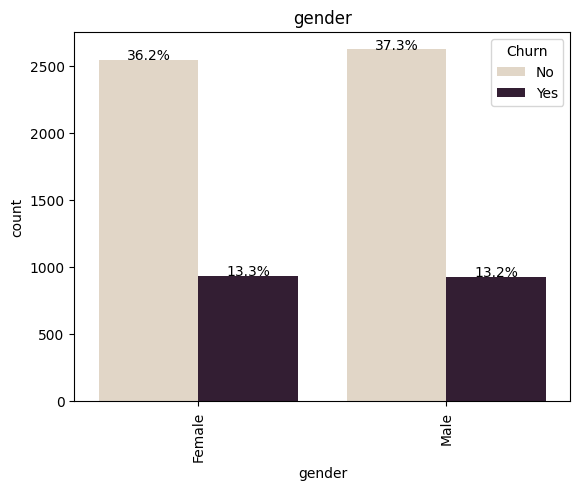

In [88]:
plot_cat_cols(df_cleaned, 'gender', 'Churn')

The distribution of gender in customer shows the same level.

##### b) Partner

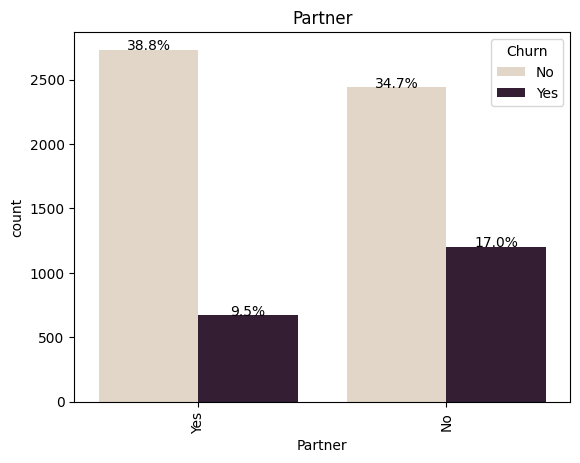

In [89]:
plot_cat_cols(df_cleaned, 'Partner', 'Churn')

In Partner features, There are more customer who have partners, but those who didn't have partners tend to churn out more.

##### c) Dependents

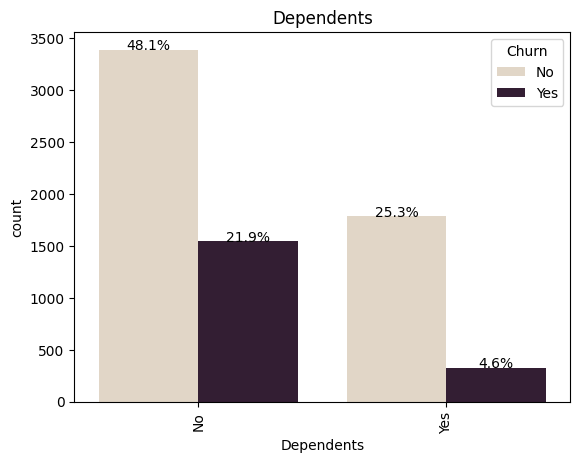

In [90]:
plot_cat_cols(df_cleaned, 'Dependents', 'Churn')

In Dependents features, There are more customer who don't have dependents (eg. children) and tend to churn out more.

##### d) PhoneService

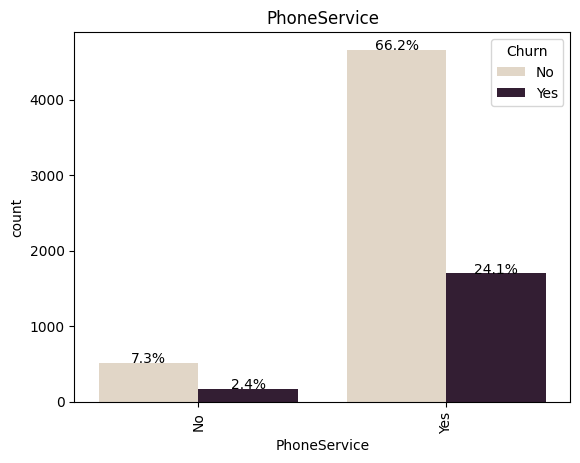

In [91]:
plot_cat_cols(df_cleaned, 'PhoneService', 'Churn')

Most of the customer have Phone Service and likely to churn.

##### e) MultipleLines

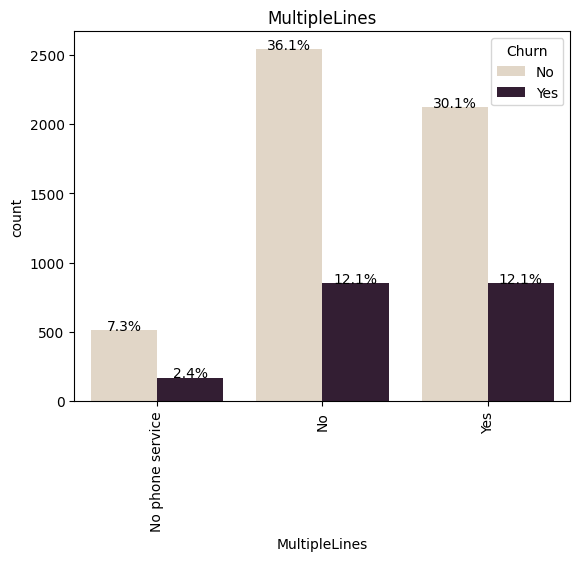

In [92]:
plot_cat_cols(df_cleaned, 'MultipleLines', 'Churn')

There are more customer who don't have multiple lines. However, the churn rate are nearly the same between customers who have and don't have multiple lines.

##### f) InternetService

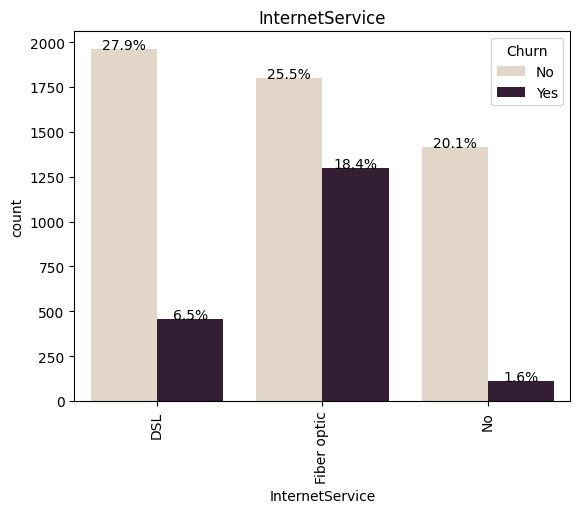

In [93]:
plot_cat_cols(df_cleaned, 'InternetService', 'Churn')

Most customer still use the DSL servcie, while those who use Fiber Optic tend to churn out more.

##### g) OnlineSecurity

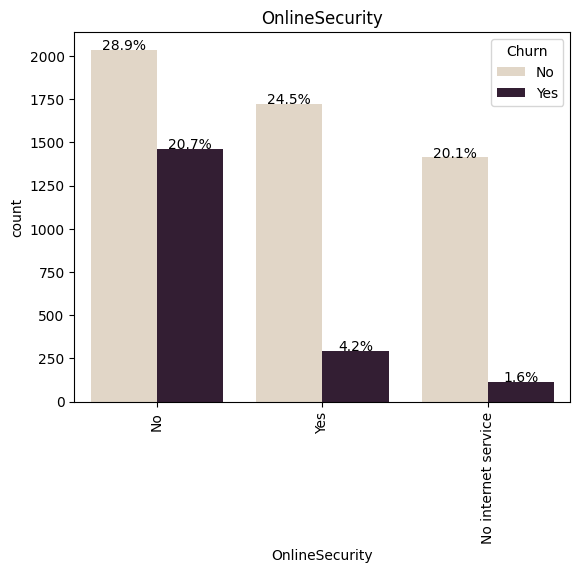

In [94]:
plot_cat_cols(df_cleaned, 'OnlineSecurity', 'Churn')

Most customers who have internet service do not have online security, and they tend to have a higher churn rate than customers who do have online security.

##### h) OnlineBackup

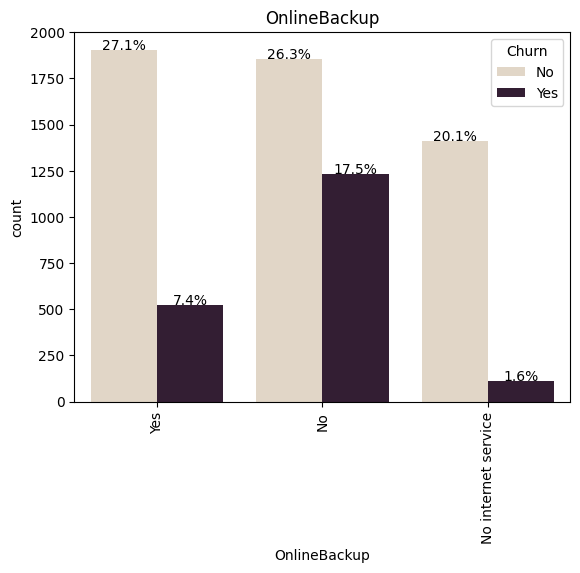

In [95]:
plot_cat_cols(df_cleaned, 'OnlineBackup', 'Churn')

Customers with internet service but no online backup tend to churn more.

##### i) DeviceProtection

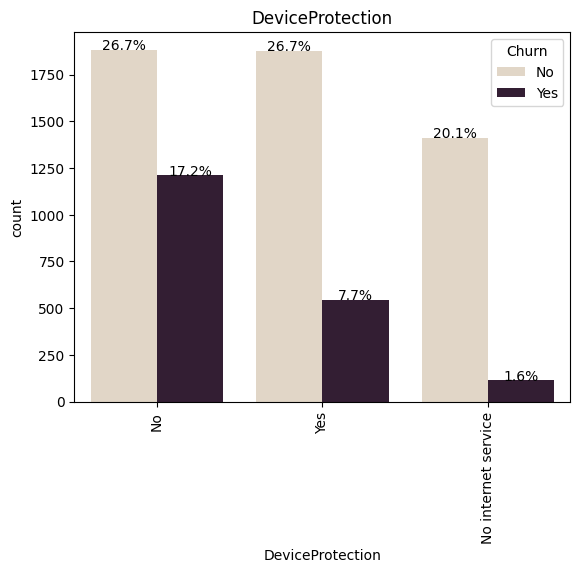

In [96]:
plot_cat_cols(df_cleaned, 'DeviceProtection', 'Churn')

Customer with internet service but no Device Protection tend to churn out more.

##### j) TechSupport

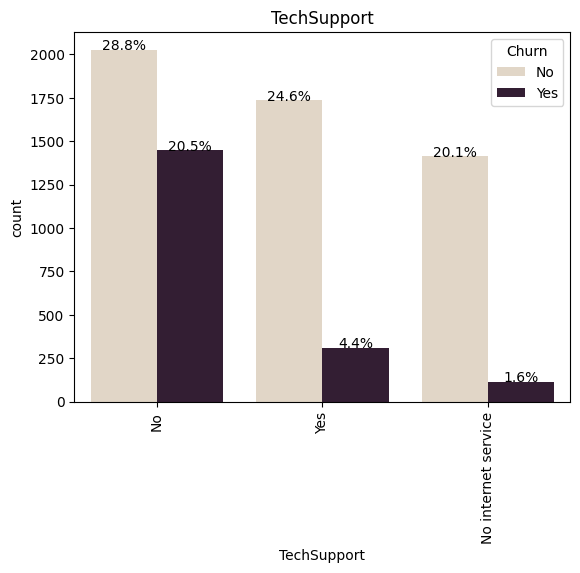

In [97]:
plot_cat_cols(df_cleaned, 'TechSupport', 'Churn')

Customer with internet service but no Tech Support tend to churn out more.

##### k) StreamingTV

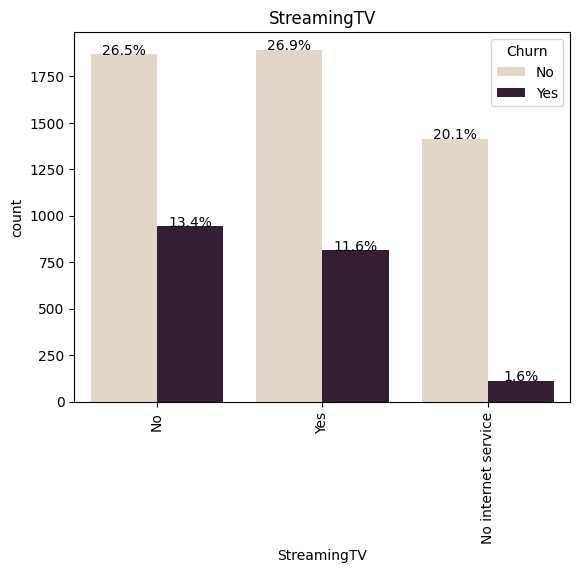

In [98]:
plot_cat_cols(df_cleaned, 'StreamingTV', 'Churn')

Customers with internet service have similar subscription rates for Streaming TV, but those without tend to churn more.

##### l) StreamingMovies

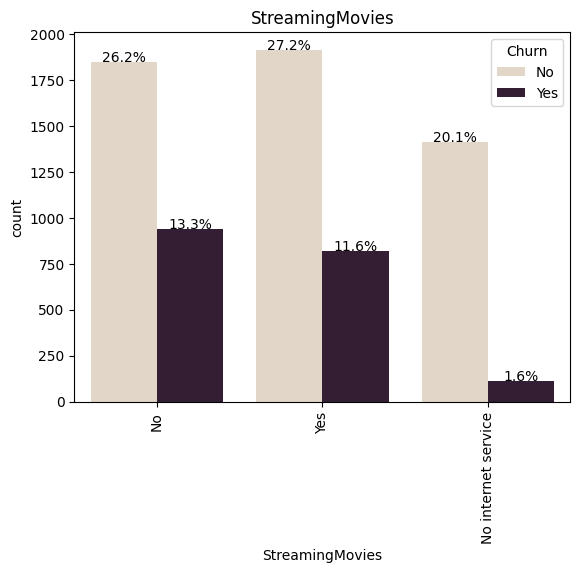

In [99]:
plot_cat_cols(df_cleaned, 'StreamingMovies', 'Churn')

Customers with internet service have similar subscription rates for Streaming Movies, but those without tend to churn more.

##### m) Contract

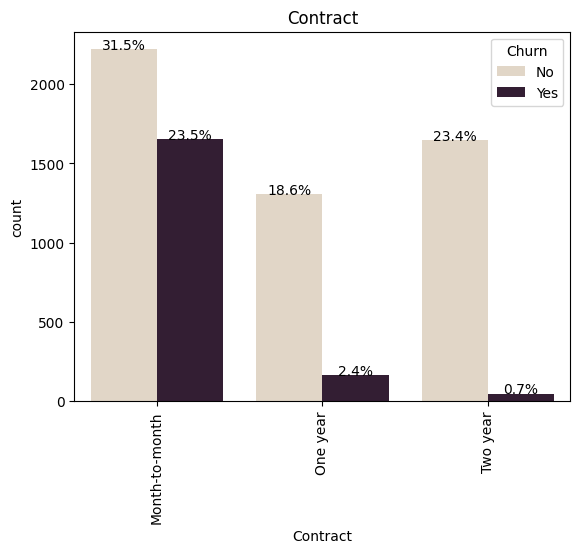

In [100]:
plot_cat_cols(df_cleaned, 'Contract', 'Churn')

It is noteworthy that customers with month-to-month contracts tend to have the highest churn rates.

##### n) PaperlessBilling

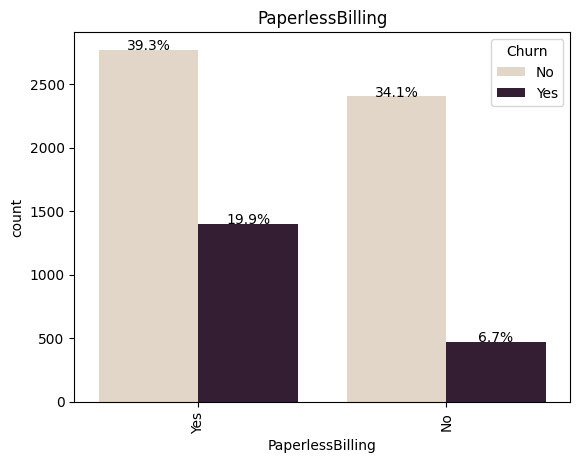

In [101]:
plot_cat_cols(df_cleaned, 'PaperlessBilling', 'Churn')

Customer who use the parperless billing tend to churn out more.

##### o) PaymentMethod

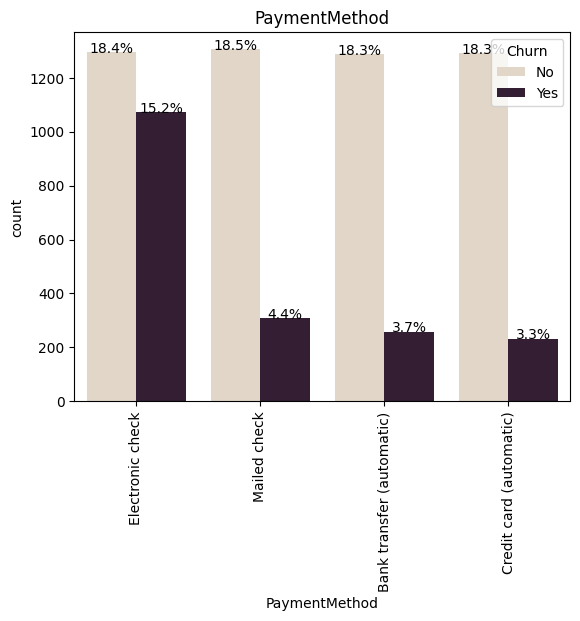

In [102]:
plot_cat_cols(df_cleaned, 'PaymentMethod', 'Churn')

Customers using the Electronic Check payment method exhibit a higher churn rate compared to those using other payment methods.

##### p) Churn

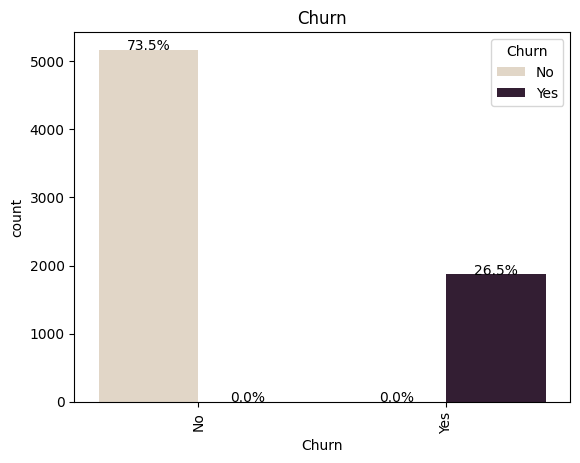

In [103]:
plot_cat_cols(df_cleaned, 'Churn', 'Churn')

Over 70% of customers do not churn.

#### 3.2 Numerical Columns